In [1]:
import numpy as np
import matplotlib.pyplot as plt
import segyio
from pandas import DataFrame

In [2]:
path = input('path do arquivo: ')
if path == '':
    path = '/home/claudio/dados/BR/sgy/envelop/'
    #path = '/home/claudio/dados/BR/correlacao/'
exten = input('extensão: ')
if exten == '':
    exten = '.sgy'
name = input('Nome do arquivo: ')
if name  == '':
    #name = 'TUP188.08@R00232A'
    #name = 'TUP188.08@R00372A'
    #name = 'TUP188.08@R00293A'
    #name = '102 CATUA_1_part-03'
    #name = 'ARU231.10@R00071'
    #name = 'IRC152.06@R00115A'
    name = '301.1.b.0.et.subb'
    
segyfile = path + name + exten
print('Arquivo: ',segyfile)

path do arquivo: 
extensão: 
Nome do arquivo: 
Arquivo:  /home/claudio/dados/BR/sgy/envelop/301.1.b.0.et.subb.sgy


In [3]:
with segyio.open(segyfile, ignore_geometry=True) as f:
    # Get basic attributes
    n_traces = f.tracecount
    sample_rate = segyio.tools.dt(f) /1000000
    n_samples = f.samples.size
    twt = f.samples
    data = f.trace.raw[:]  # Get all data into memory (could cause on big files)
    sr = sample_rate

f'Num Traces: {n_traces}, Num Samples: {n_samples}, Sample rate: {sample_rate} s, Trace length: {max(twt)} ms'

'Num Traces: 24035, Num Samples: 2604, Sample rate: 6.3e-05 s, Trace length: 163.989 ms'

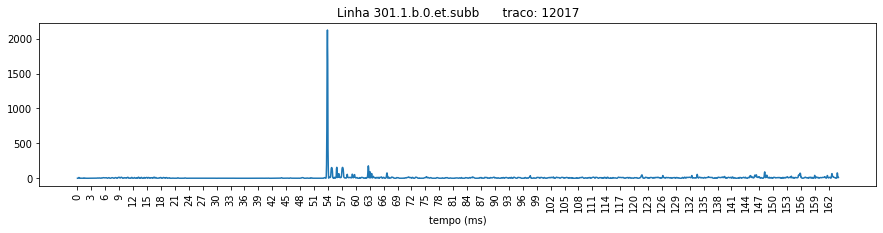

In [4]:
tr = int(n_traces/2)
plt.figure(figsize=(15,3))
n = sample_rate * n_samples * 1000  # xmax em ms
x = np.linspace(0, n, n_samples)
y = data[tr]
num = n//50
interv = np.arange(0, n, num)
plt.xticks(interv, rotation='vertical')
plt.plot(x, y)
plt.xlabel('tempo (ms)')
plt.title('Linha '+name+'      traco: '+ str(tr))
plt.show()

In [5]:
print('******* Definir janela da imagem **********')
tmi = int(input('tempo inicial (ms): '))
tmf = int(input('tempo final (ms): '))
tri = int(input('traco inicial: '))
trf = int(input('traco final: '))



******* Definir janela da imagem **********
tempo inicial (ms): 54
tempo final (ms): 79
traco inicial: 10621
traco final: 10631


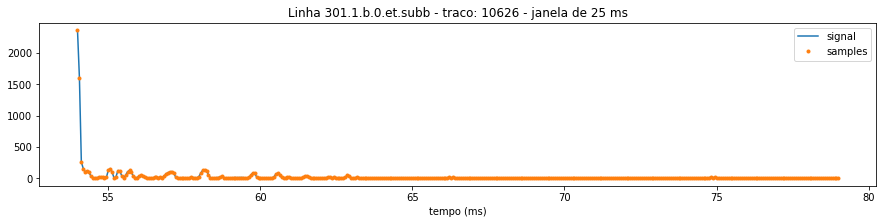

In [6]:
# convertendo ms to samples
spi = int(tmi/sr /1000 )  # amostra inicial
spf = int(tmf/sr /1000 )  # amostra final

sig = data[tri:trf, spi:spf]

tr = (trf - tri)//2 # pega o traco do meio

y = data[tr, spi:spf]   # y sao os dados da janela em samples no traco tr
x = np.linspace(tmi, tmf, len(y))  # eixo x em milisegundos

plt.figure(figsize=(15,3))
plt.xlabel('tempo (ms)')
plt.title('Linha '+name+' - traco: '+ str(tri + tr)+' - janela de '+ str(tmf - tmi)+' ms')
plt.plot(x, y, label=('signal'))
plt.plot(x, y, '.', label=('samples'))
plt.legend()
plt.savefig(path+name+'_window_trace.png')
plt.show()

In [7]:
n_traco = []
time = []
raw = data[tri:trf,spi:spf]
raw = np.ravel(raw)

win_trc = trf-tri
win_smp = spf-spi

for tr in range(win_trc):
    for j in range(win_smp):
        n_traco.append(tr)
        t = j*sr*1000 + tmi  # samples to ms
        time.append(t) 

In [8]:
D = {'n_trace': n_traco, 'time': time, 'raw signal': raw}
df = DataFrame(D, columns=['n_trace', 'time', 'raw signal'])
f = path+name+'_raw.csv'
export_csv = df.to_csv (f, index = None, header=True) 
print('finish')

finish
